<a href="https://colab.research.google.com/github/SoleromYess/Simulaci-n-II/blob/main/1erParcial_Examen%5C1_Problema_del_encuentro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yessica Morelos Moreno
#**Problema del encuentro**

Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30]. Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10.

a) Por simulación

b) Analíticamente


**Solución**

> # **a) Por simulación** 
> 1. **Definición de variables**
>
> $x$: tiempo de llegada de la primera persona. 
>
> $y$: tiempo de llegada de la segunda persona.
>
> 2. **Se determina la distribución de probabilidad**
>
> Variables aleatorias uniformes
>
> $x \sim U$ y $y \sim U$
>
> 3. **Modelación las variables aleatorias**
>
> $x \sim U[0, 30]$ y $y \sim U[0, 30]$
>
> 4. **Modelo del sistema y Objetivos de la simulación**
>
>La diferencia  $ |x−y| $  modela adecuadamente el sistema.
>
>Si  $ |x−y| \leq 10$  el tiempo de espera entre la llegada de ambas personas será menor o igual a 10 minutos.
>
>**Objetivo:** determinar la frecuencia con que esto ocurre, lo cual nos dará una estimación de la probabilidad del tiempo de espera.
>
>Por lo que, la simulación queda expresada con el siguiente código.

In [1]:
#Librerías
import random 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Función que simula una cita y retorna el tiempo de espera.
def cita():
    # Simular tiempos de llegada de las dos personas
    x_1 = random.uniform(0, 30) #Los numéros aleatorios serán de tipo flotante en un rango de 0 a 30
    x_2 = random.uniform(0, 30)
    # Calcular el tiempo de espera
    tiempo_espera = abs(x_1-x_2)
    # Devuelve el tiempo de espera
    return x_1, x_2, tiempo_espera

In [3]:
print("Tiempo de llegada 1: %.1f minutos \nTiempo de llegada 2: %.1f minutos \n\nTiempo de espera: %.1f minutos" %cita())

Tiempo de llegada 1: 4.5 minutos 
Tiempo de llegada 2: 5.3 minutos 

Tiempo de espera: 0.8 minutos


> 5. **Diseñe el experimento**
>
>Para estimar la probabilidad del tiempo de espera entre $[0,10]$, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa la probabilidad de tiempo de espera.

In [4]:
def prob_inter(n):
    Espera_10 = []
    Espera = []                    
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay Espera_10 y dividide entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        tiempos = cita()
        Espera.append(tiempos[2])
        if tiempos[2] <= 10:
          Espera_10.append(tiempos[2]) 
        prob.append(len(Espera_10)/(i+1))
    return prob

In [5]:
X = prob_inter(10000)

Text(0, 0.5, 'Probabilidad')

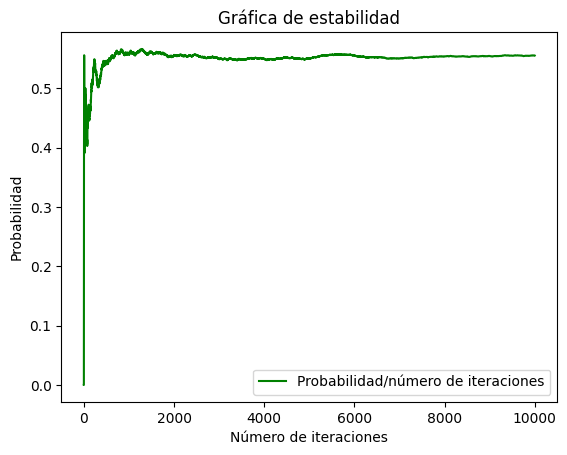

In [6]:
plt.plot(X , 'g-',label='Probabilidad/número de iteraciones')
plt.title('Gráfica de estabilidad')
plt.legend()
plt.xlabel('Número de iteraciones')
plt.ylabel('Probabilidad')

In [9]:
print(np.mean(X), np.std(X))

0.5506935776647657 0.016531896396196507


> 6. **Repita el experimento $n$ veces**
>
>Una forma de hacerlo es mediante el siguiente codigo.

In [7]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

La probabilidad de que el tiempo de espera de llegada entre ambas personas sea $\leq10$ es de:

In [26]:
Y = np.mean(modelo(100))
print(Y)

0.5577245447045861


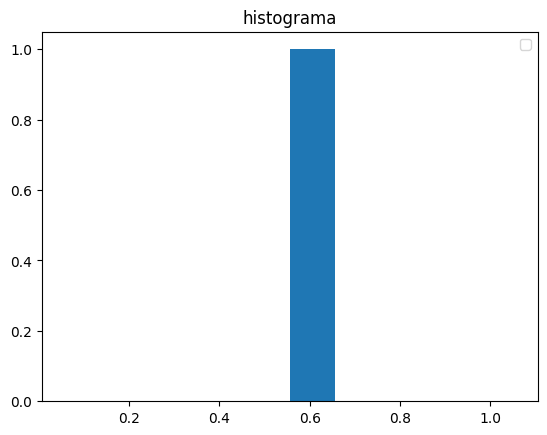

In [19]:
plt.hist(Y)
plt.title('histograma')
plt.legend()
plt.show()

In [23]:
print("media = ", np.mean(Y), "desv estándar = ", np.std(Y))

media =  0.5557961533738611 desv estándar =  0.0


>7. **Hallamos el intervalo de confianza.**
>
>$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$
>
>*con un 95% de confianza

In [28]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(1000), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(1000)

(0.5577245447045861, 0.5577245447045861)

> # **b) Analíticamente** 
>Para determinar la probabilidad de que la primera persona espere como máximo 10 minutos, podemos considerar el conjunto de puntos en el plano $(x, y)$ donde $x$ es el tiempo de llegada de la primera persona y $y$ es el tiempo de llegada de la segunda persona.
> 
>Este conjunto de puntos se puede definir como $$S = \{(x, y) \in [0,30] \times [0,30] : |x - y| \leq 10\}$$ que corresponde a todos los pares de tiempos de llegada que cumplen con la condición de que la primera persona espera como máximo 10 minutos.
>
>Graficando la desigualdad:

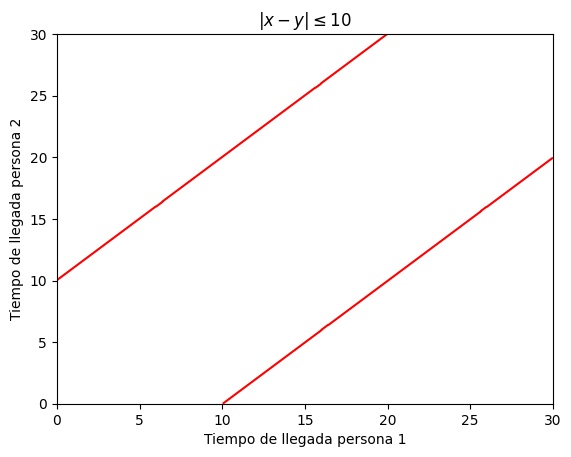

In [29]:
# Definimos la función de la desigualdad
def inequality(x, y):
    return np.abs(x - y) <= 10

# Creamos valores para x y y
x = np.linspace(0, 30, 1000)
y = np.linspace(0, 30, 1000)
X, Y = np.meshgrid(x, y)
Z = inequality(X, Y)
plt.contour(X, Y, Z, levels=[0, 1], colors=['red', 'blue'])
plt.xlabel('Tiempo de llegada persona 1')
plt.ylabel('Tiempo de llegada persona 2')
plt.title('$|x-y| \leq 10$')

plt.show()

>En el gráfico podemos observar que la región entre las rectas rojas es el área favorable para la desigualdad $|x-y|\leq 10$.
>
>Observamos que podemos calcular el área de los dos triángulos en las esquinas del gráfico.
>
>Dado que son de las mismas medidas:
>$$área~de~triángulo~=~\frac{b * h}{2} = \frac{(30-10)*(30-10)}{2} = 200$$
>
>$$Área~total~=~30^2~=~900$$
>
>Luego, la probabilidad queda dada por:
>
>$$P~=~\frac{900-2(200)}{900}~=~\frac{500}{900}~≈~0.5556$$
